In [35]:
Sys.Date()

[1] "2020-02-10"

In [36]:
libraries = c("dplyr","magrittr","tidyr", "purrr", "ggplot2","gridExtra","RColorBrewer","zoo","scales","colorspace","readxl")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE) }

'%&%' = function(x,y) paste0(x,y)

theme_set(theme_classic(base_size=12, base_family="sans"))
fnt_size = 11

CUTOFF_TMAX = as.Date('2020-01-24')

In [37]:
drname = '../../results/Scenario-2/sens_CUTOFF_TIME'
df = data.frame(filename=list.files(drname, pattern="incidence"), stringsAsFactors = FALSE) %>% 
    mutate(date = stringr::str_split(filename, "_") %>% map_chr(., 1)) %>% filter(date<=CUTOFF_TMAX)
df

filename,date
<chr>,<chr>
2020-01-17_incidence.csv,2020-01-17
2020-01-18_incidence.csv,2020-01-18
2020-01-19_incidence.csv,2020-01-19
2020-01-20_incidence.csv,2020-01-20
2020-01-21_incidence.csv,2020-01-21
2020-01-22_incidence.csv,2020-01-22
2020-01-23_incidence.csv,2020-01-23
2020-01-24_incidence.csv,2020-01-24


In [38]:
for (i in 1:nrow(df)) {
    df_ = read.csv(drname%&%"/"%&%df$filename[i])
    df_ = df_[df_$var=='r',] %>% select(-time,-var)
    if (i==1) 
        df_r = c(df[i,'date'], df_[1,] %>% as.numeric)
    else {
        df_r = rbind(df_r, c(df[i,'date'], df_[1,] %>% as.numeric))
    }
}
df_r  = data.frame(df_r, stringsAsFactors = FALSE, row.names = 1:nrow(df_r))
names(df_r) = c('date','mean','lower','upper')
df_r %<>% mutate(date = as.Date(date)) %>% mutate_each(as.numeric, -date)
df_r

date,mean,lower,upper
<date>,<dbl>,<dbl>,<dbl>
2020-01-17,0.416528,0.171000,0.662888
2020-01-18,0.367254,0.181377,0.544463
2020-01-19,0.321772,0.163682,0.479891
2020-01-20,0.297315,0.162554,0.434859
2020-01-21,0.285919,0.172491,0.398510
2020-01-22,0.278573,0.180938,0.374860
2020-01-23,0.271481,0.192132,0.348433
2020-01-24,0.291416,0.221776,0.359277


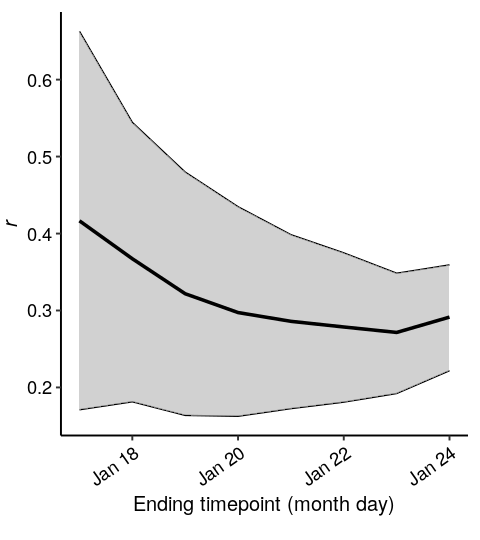

In [39]:
cs = c(4, 4.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

df_r %>% 
    ggplot(aes(x=date, y=mean, group = 1)) +
    geom_line(aes(y=lower), color="black", size=.4) +
    geom_line(aes(y=upper), color="black", size=.4) +
    geom_ribbon(data=df_r, aes(x=date, ymin = lower, ymax = upper), 
                alpha = 0.6, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), color="black", size=1) +
    xlab("Ending timepoint (month day)") + ylab(expression(italic(r))) +
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) -> fig21

fig21

ggsave(plot=fig21, width=cs[1], height=cs[2],filename="../../figures/draft/figS31.pdf",useDingbats=FALSE)

In [30]:
t0 = as.Date('2019-12-08')
for (i in 1:nrow(df)) {
    df_ = read.csv(drname%&%"/"%&%df$filename[i])
    df_ = df_[df_$var=='Incidence',] %>% select(-var)
    if (i==1) {
        df_r = df_ %>% as.matrix
        df_r = cbind(rep(df$`date`[i], nrow(df_)), df_r)
    } else {
        df_r = rbind(df_r, cbind(rep(df$`date`[i], nrow(df_)), df_ %>% as.matrix))
    }
}
df_r  = data.frame(df_r, stringsAsFactors = FALSE, row.names = 1:nrow(df_r))
names(df_r) = c('CUTOFF_TIME','time','mean','lower','upper')
df_r %<>% mutate(CUTOFF_TIME = as.Date(CUTOFF_TIME)) %>% mutate_each(as.numeric, -CUTOFF_TIME) %>% mutate(date = t0+time)
tail(df_r)

,CUTOFF_TIME,time,mean,lower,upper,date
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
343,2020-01-24,42,4384.100,3299.191,5501.985,2020-01-19
344,2020-01-24,43,5881.963,4252.301,7628.789,2020-01-20
345,2020-01-24,44,7901.088,5425.113,10661.717,2020-01-21
346,2020-01-24,45,10626.097,6866.871,15003.120,2020-01-22
347,2020-01-24,46,14308.110,8660.967,21250.151,2020-01-23
348,2020-01-24,47,19289.088,10900.904,30158.357,2020-01-24


In [31]:
date_max = df_r$date %>% max
date_max

[1] "2020-01-24"

In [32]:
for (i in 1:nrow(df)) {
    df_ = read.csv(drname%&%"/"%&%df$filename[i])
    df_ = df_[df_$var=='CFR',] %>% select(-var)
    if (i==1) {
        df_CFR = df_ %>% as.matrix
        df_CFR = cbind(rep(df$`date`[i], nrow(df_)), df_CFR)
    } else {
        df_CFR = rbind(df_CFR, cbind(rep(df$`date`[i], nrow(df_)), df_ %>% as.matrix))
    }
}
df_CFR  = data.frame(df_CFR, stringsAsFactors = FALSE, row.names = 1:nrow(df_CFR))
names(df_CFR) = c('CUTOFF_TIME','time','mean','lower','upper')
t_max = df_CFR$`time` %>% as.numeric %>% max
df_CFR %<>% mutate(CUTOFF_TIME = as.Date(CUTOFF_TIME)) %>% mutate_each(list(~as.numeric(.)*100), -CUTOFF_TIME) %>%
    group_by(CUTOFF_TIME) %>%
    mutate(time = time/100, date = CUTOFF_TIME-max(time)+time) %>%
    ungroup
tail(df_CFR,5)

CUTOFF_TIME,time,mean,lower,upper,date
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2020-01-24,12,4.7869,1.5472,9.7697,2020-01-20
2020-01-24,13,8.9308,4.3244,15.4304,2020-01-21
2020-01-24,14,8.8586,4.8017,14.4150,2020-01-22
2020-01-24,15,9.3376,5.6243,14.3151,2020-01-23
2020-01-24,16,8.3878,5.3419,12.2617,2020-01-24


Warning message:
“Removed 176 rows containing missing values (geom_path).”


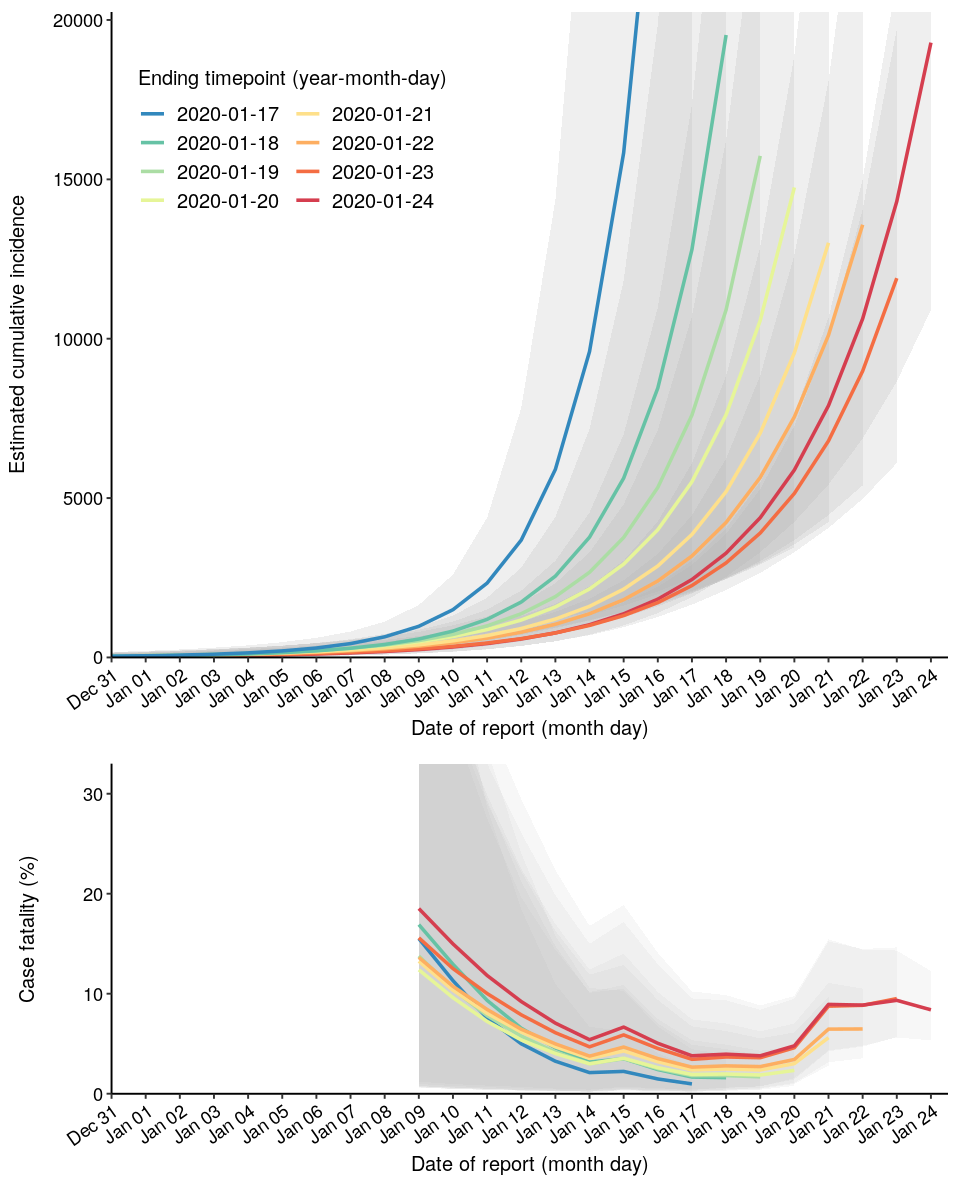

In [33]:
cs = c(8, 10)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])
xmax = max(df_r$CUTOFF_TIME)

df_r %>% mutate(CUTOFF_TIME = as.factor(CUTOFF_TIME)) %>%
    ggplot(aes(x=date, y=mean, group = desc(CUTOFF_TIME), color=CUTOFF_TIME)) +
    geom_ribbon(data=df_r, aes(x=date, ymin = lower, ymax = upper, group=CUTOFF_TIME), 
                alpha = 0.2, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), size=1) +
    scale_color_brewer(palette = "Spectral", direction=-1) +
    xlab("Date of report (month day)") + 
    ylab("Estimated cumulative incidence\n") +
    guides(color=guide_legend(ncol=2, 
                              title = "Ending timepoint (year-month-day)")) + 
    theme(plot.margin = unit(c(.5,.5,1,.25),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text =element_text(size=fnt_size, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          legend.position = c(0.22, 0.8),
          axis.title.y = element_text(vjust = .5),
          legend.text = element_text(size = 12, family="sans"),
          legend.spacing.y = unit(.25, 'cm')) +
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),xmax+.5)) +
    scale_y_continuous(expand=c(0,.01)) +
    coord_cartesian(ylim = c(0,20250)) -> fig22

df_CFR %>% mutate(CUTOFF_TIME = as.factor(CUTOFF_TIME)) %>%
    ggplot(aes(x=date, y=mean, group = CUTOFF_TIME, color=CUTOFF_TIME)) +
    geom_ribbon(data=df_CFR, aes(x=date, ymin = lower, ymax = upper, group=CUTOFF_TIME), 
                alpha = 0.1, fill="grey70", inherit.aes=FALSE) +
    geom_line(aes(y=mean), size=1) +
    scale_color_brewer(palette = "Spectral", direction=-1) +
    xlab("Date of report (month day)") + 
    ylab("Case fatality (%)\n") +
    guides(color=F) + #guide_legend(ncol=2, title = "Timepoint when incidence equates\n to one (year-month-day)")) + 
    theme(plot.margin = unit(c(0,.5,1,1.5),"lines"),
          text = element_text(family="sans",color="black"),
          axis.text.x = element_text(angle = 35, hjust = 1),
          axis.text = element_text(size=fnt_size, family="sans",color="black"),
          axis.title.y = element_text(vjust = 4.5),
          axis.title = element_text(size=fnt_size+1, family="sans",color="black"),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank()) +
    scale_x_date(expand=c(0,0), date_labels="%b %d",date_breaks  ="1 day",
                 limits=c(as.Date('2019-12-31'),xmax+.5)) +
    scale_y_continuous(expand=c(0,.01)) +
    coord_cartesian(ylim = c(0,33)) -> fig23

pFinal = grid.arrange(fig22, fig23, heights=c(1.75,1), nrow=2, ncol=1);

ggsave(plot=pFinal, width=cs[1], height=cs[2],filename="../../figures/draft/figS32.pdf",useDingbats=FALSE)